# Notebook 2:  Clustering con Modelo de Mezclas de Normales (GMM)

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio considerando el uso de un función que permita medir la calidad del agrupamiento cuando se conocen los grupos de cada observación.

In [11]:
#install.packages("mclust")
#install.packages("cluster")
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")
summary(datos)

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 4 components: 

 log-likelihood   n df       BIC       ICL
       177.3167 210 93 -142.6475 -157.7975

Clustering table:
 1  2  3  4 
67 75 23 45 

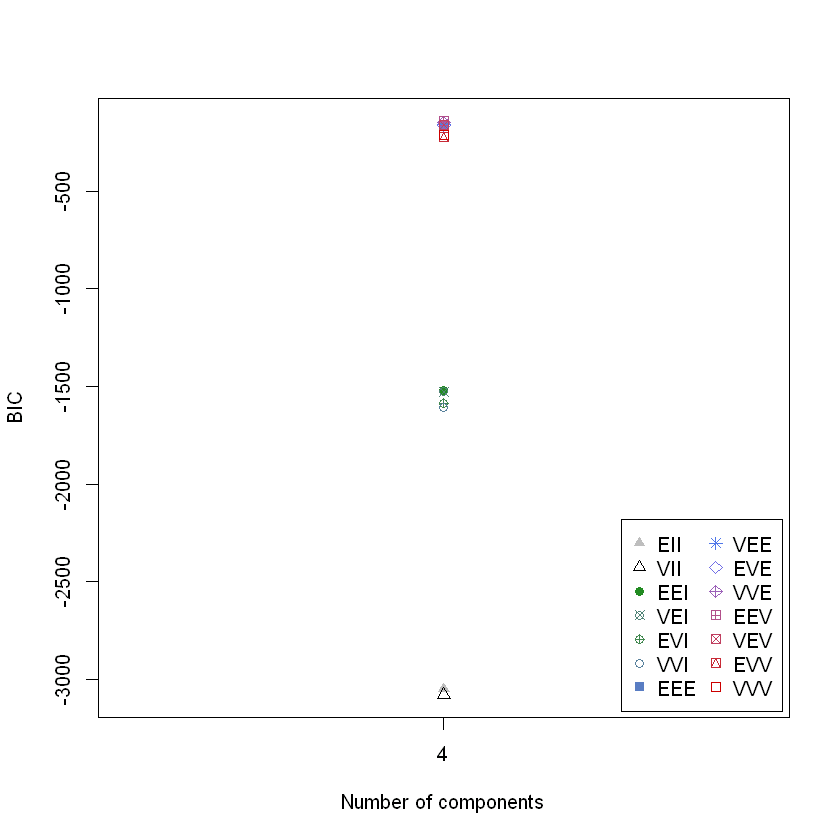

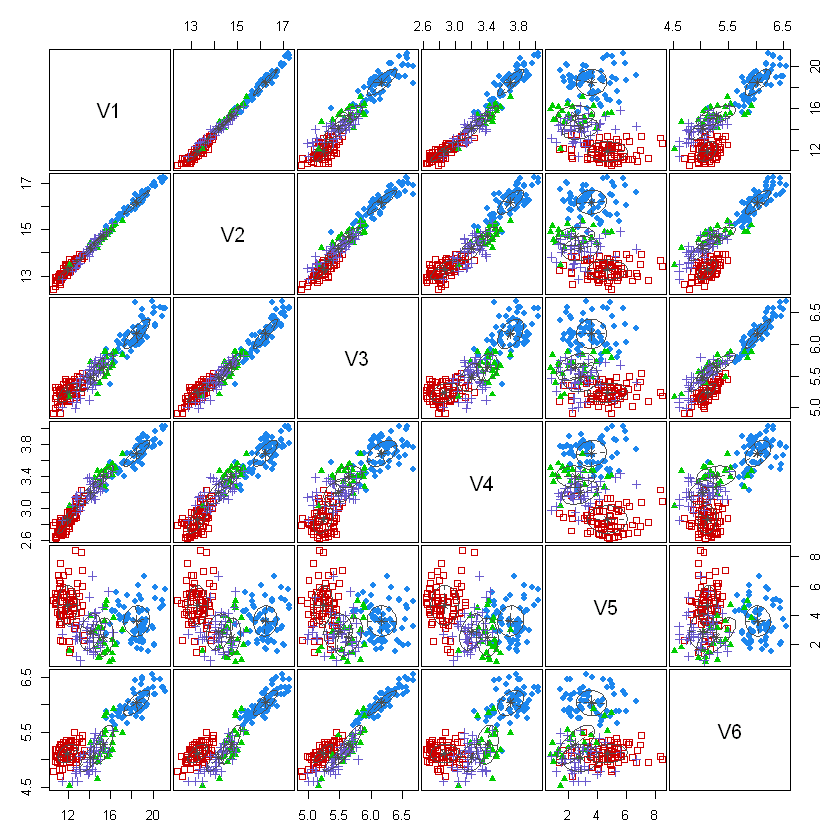

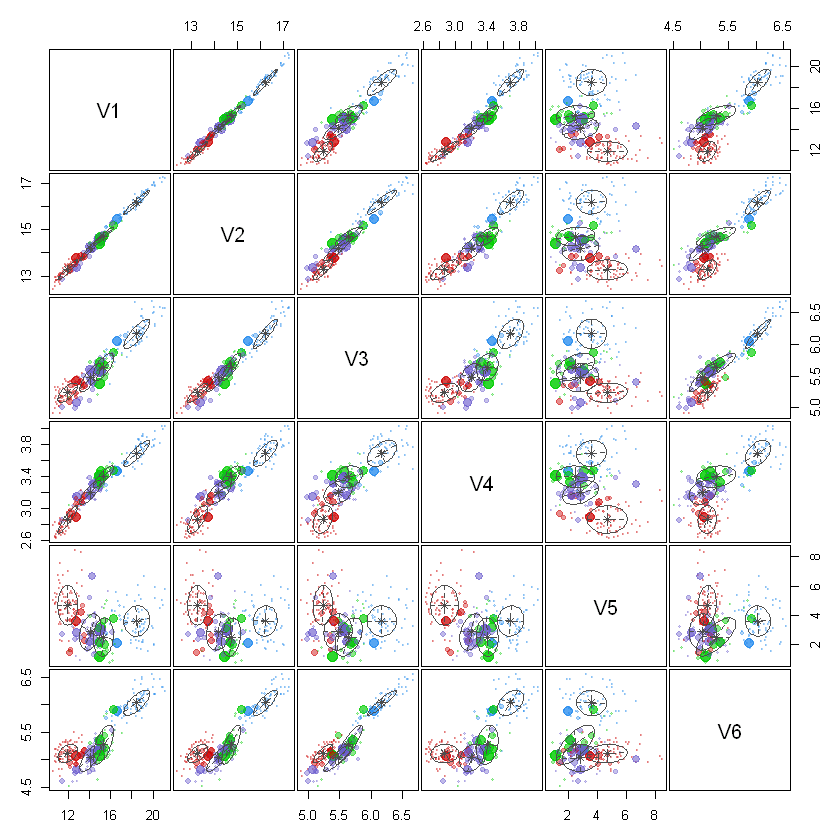

'Mclust' model object: (EEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

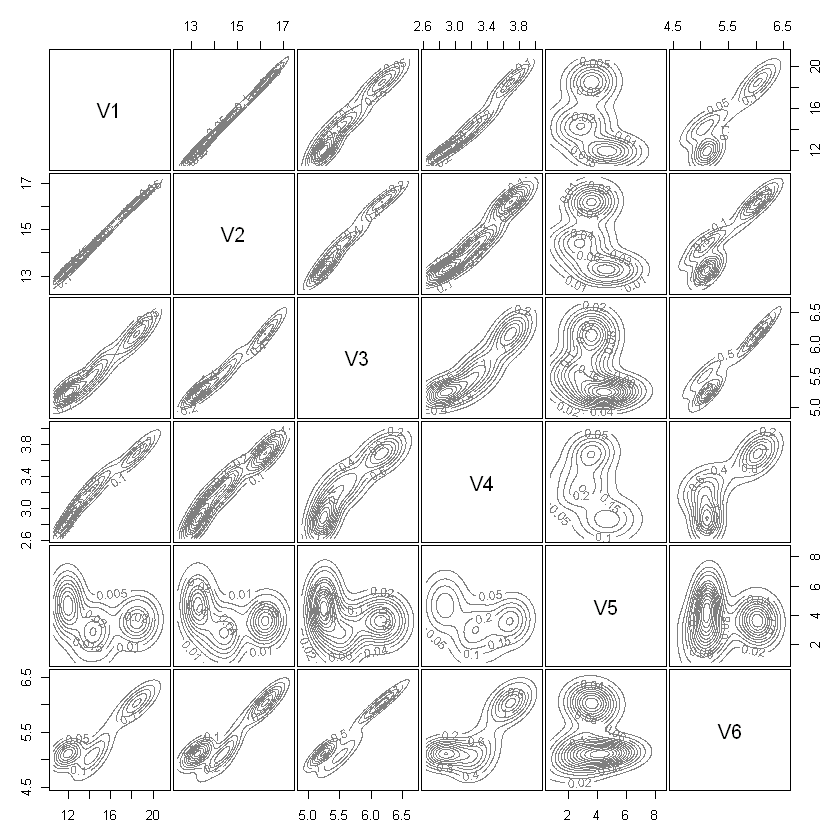

In [12]:
clus <-Mclust(datos, G = 4)
summary(clus)
plot(clus)
clus




In [13]:
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers


V1,V2,V3,V4,V5,V6
18.46213,16.19470,6.167813,3.690301,3.596481,6.033091
11.93175,13.27016,5.234781,2.863010,4.682985,5.113286
15.29414,14.71759,5.641832,3.398164,2.495003,5.274619
14.07522,14.18237,5.472207,3.200684,2.842341,5.035122


**Ejercicio 1:**

a) Explique como funciona el método Mclust, describa los principales parámetros de entrada y salida.
- Parametros de entrada: datos que es un matriz de variables y observaciones y G (cluster a utilizar) en este caso se condiciona a que sean 4 (G=4), si no se agrega G, el método selecciona 2  cluster.
- Parametros de salida: 
    - Dice que se ha ajustado a un modelo de mezcla gaussiana usando el algoritmo EM (Expectation - Maximation)
    - A legido Mclust EVV con 4 componentes Cluster
    - n = 210,  muestra el numero total de observaciones 
    

b) Interprete y comente los resultados obtenidos.
- El modelo asigno los 210 observaciones entre los 4 cluster de la forma 
Cluster 1 -> 67 observaciones
Cluster 2 -> 75 observaciones
Cluster 3 -> 23 observaciones
Cluster 4 -> 45 observaciones

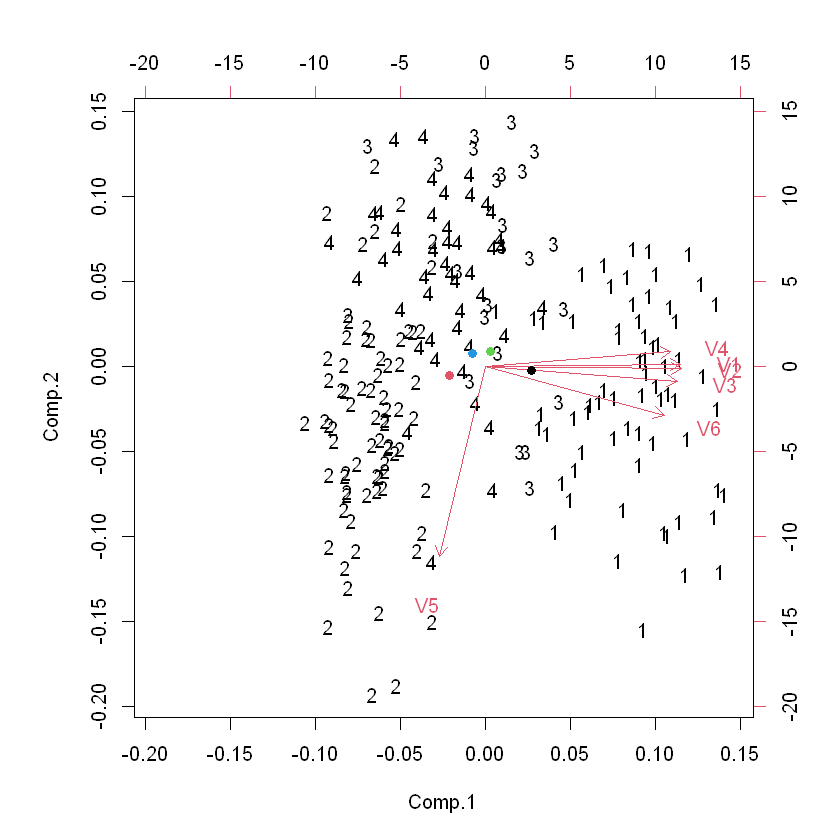

In [14]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log L(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

**Ejercicio 2:**

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

**En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico**

In [15]:
help(hclust)

hclust {stats},R Documentation
d,a dissimilarity structure as produced by dist.
method,"the agglomeration method to be used. This should be (an unambiguous abbreviation of) one of ""ward.D"", ""ward.D2"", ""single"", ""complete"", ""average"" (= UPGMA), ""mcquitty"" (= WPGMA), ""median"" (= WPGMC) or ""centroid"" (= UPGMC)."
members,NULL or a vector with length size of d. See the ‘Details’ section.
x,an object of the type produced by hclust.
hang,The fraction of the plot height by which labels should hang below the rest of the plot. A negative value will cause the labels to hang down from 0.
check,"logical indicating if the x object should be checked for validity. This check is not necessary when x is known to be valid such as when it is the direct result of hclust(). The default is check=TRUE, as invalid inputs may crash R due to memory violation in the internal C plotting code."
labels,A character vector of labels for the leaves of the tree. By default the row names or row numbers of the original data are used. If labels = FALSE no labels at all are plotted.
"axes, frame.plot, ann",logical flags as in plot.default.
"main, sub, xlab, ylab",character strings for title. sub and xlab have a non-NULL default when there's a tree$call.
...,"Further graphical arguments. E.g., cex controls the size of the labels (if plotted) in the same way as text."


**Ejercicio 3:** 

a) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD) y resuma brevemente en que consisten.

#### Metodo Purity: 
Este método es una medida de evaluación externa utilizada en clustering para cuantificar qué tan bien los clusters obtenidos coinciden con una clasificación conocida. Evalúa el grado de homogeneidad de los clusters, es decir, qué proporción de los elementos en cada cluster pertenecen a la clase más común dentro de ese cluster.

Se calcula de la siguiente manera:

$$ Purity  =  \sum_{i} \frac{N_i}{N} p_{i} $$

Así. La pureza toma valores entre 0 (muy mala clasificación) y 1 (clasificación perfecta). Sin embargo, no penaliza por el número de clusters. Es decir, si pusiéramos cada punto en su propio cluster (uno por clase), se obtendría una pureza de 1, pero eso no significa que el clustering sea útil.

#### Método Rand Index
En este método se evalúa cuántos pares de elementos están de acuerdo o en desacuerdo entre dos asignaciones de clustering, considerando todas las posibles parejas de puntos, y así mirar la similitud entre las dos asignaciones de clustering.

Se calcula de la siguiente manera:

$$RI =  \frac{TP + TN}{TP + FP + FN + TN}$$

En donde:

$TP$ (True Positives): Número de pares que están en el mismo cluster

$TN$ (True Negatives): Pares que están en clusters diferentes

$FP$ (False Positives): Pares en el mismo cluster en U pero en clusters diferentes en V

$FN$ (False Negatives): Pares en clusters diferentes en U pero en el mismo cluster en V.

En donde U, es un Clustering generado y V, es un Clustering real o de referencia

Además, cuando:

$RI = 1$, indica una coincidencia perfecta entre el clustering y la referencia.

$RI = 0$, indica una discordancia total.

#### Método Mutual Information
Otra forma de medir la calidad de un clustering es calcular la información mutua entre U y V, es decir, ver la información en comun entre dos clusters.
Se define la probabilidad conjunta como la probabilidad de que un objeto elegido al azar pertenezca simultáneamente al clúster i en U y j en V

$$p_{ij} =  \frac{|U_i \cap V_j|}{N}$$

Asimismo, las probabilidades marginales para cada partición son:

$$p_i =\frac{|U_i|}{N} \mbox{  y   } p_j = \frac{|V_j|}{N} $$ 

Con lo cual, la información mutua se calcula de la siguiente manera:

$$MI = \sum_{i=1}^{R} \sum_{j=1}^{C} p_{ij} \log \left( \frac{p_{ij}}{p_i p_j} \right)$$

Los resultados provenientes de la formula, se pueden interpretar como:

Un valor minimo igual a 0: Esto ocurre cuando las particiones son completamente independientes: conocer un cluster de U no te da ninguna pista sobre el cluster en V. No hay información compartida.

Un valor máximo: Este valor va a depender de los datos, pero estos tipos de valores indican una mayor similitud entre los clusters, lo cual indican que puede haber mucha información compartida



-----------------------------------------------------------------------------------------------------------------------------------------------

Considere el archivo "semillas.txt" que contiene una séptima variable con la clasificación de las semillas en tres variedades: 
- 1: Kama
- 2: Rosa
- 3: Canadian

b) Calcule alguna de las medidas de calidad estudiadas para los agrupamientos obtenidos con  KMeans (tarea anterior) y GMM, considerando la etiqueta en V7 para sus cálculos. Compare y discuta sus resultados.

In [16]:
datos1 <-read.table("..//data//semillas.txt",dec=".")
summary(datos1)

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6              V7   
 Min.   :0.765   Min.   :4.519   Min.   :1  
 1st Qu.:2.562   1st Qu.:5.045   1st Qu.:1  
 Median :3.599   Median :5.223   Median :2  
 Mean   :3.700   Mean   :5.408   Mean   :2  
 3rd Qu.:4.769   3rd Qu.:5.877   3rd Qu.:3  
 Max.   :8.456   Max.   :6.550   Max.   :3  

In [37]:
#kmeans proveniente de la tarea anterior con k = 3
cl1 <- kmeans(datos,3,iter.max=1000,nstart=10)$cluster

clus <-Mclust(datos, G = 3)
cl2 <- clus$classification

In [38]:
tab1 <-table(datos1$V7, cl1)
tab2 <-table(datos1$V7, cl2)

tab1
tab2


   cl1
     1  2  3
  1 60  9  1
  2 10  0 60
  3  2 68  0

   cl2
     1  2  3
  1  0 13 57
  2 68  0  2
  3  0 70  0

In [39]:
purity <- function(clusters, clases) {
  sum(apply(table(clases, clusters), 2, max)) / length(clusters)
}



In [40]:
purity(datos1$V7, cl1)
purity(datos1$V7, cl2)

[1] 0.8952381

[1] 0.9285714

Se evaluaron los dos métodos de agrupamiento no supervisado sobre el conjunto de datos de semillas, utilizando como referencia las clases verdaderas provistas en la columna V7. Para evaluar la calidad de los agrupamientos, se utilizó la medida $Purity$, una métrica que mide cuán bien coinciden los clusters generados con las clases reales.

Los resultados fueron:

$Pureza Kmeans =$ 0.895238095238095

$Pureza GMM =$ FALTA COLOCAR, DEBERIA SER MEJOR ESTE

La pureza más alta obtenida se puede apreciar que fue por el modelo GMM indicando que este método logró una mejor correspondencia con las clases verdaderas en comparación con KMeans, al estar más cercano al valor 1.